Load the 📊`tidyverse`, 🐧`palmerpengions`, and ⚖`scales` packages.

In [1]:
library('tidyverse')
library('palmerpenguins')
library ('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘palmerpenguins’ was built under R version 4.1.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Use `geom_density` to create the following figure from the `penguins` data.

<img src="https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/06/palmer-kde.png" 
     style="width: 700px;" />

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


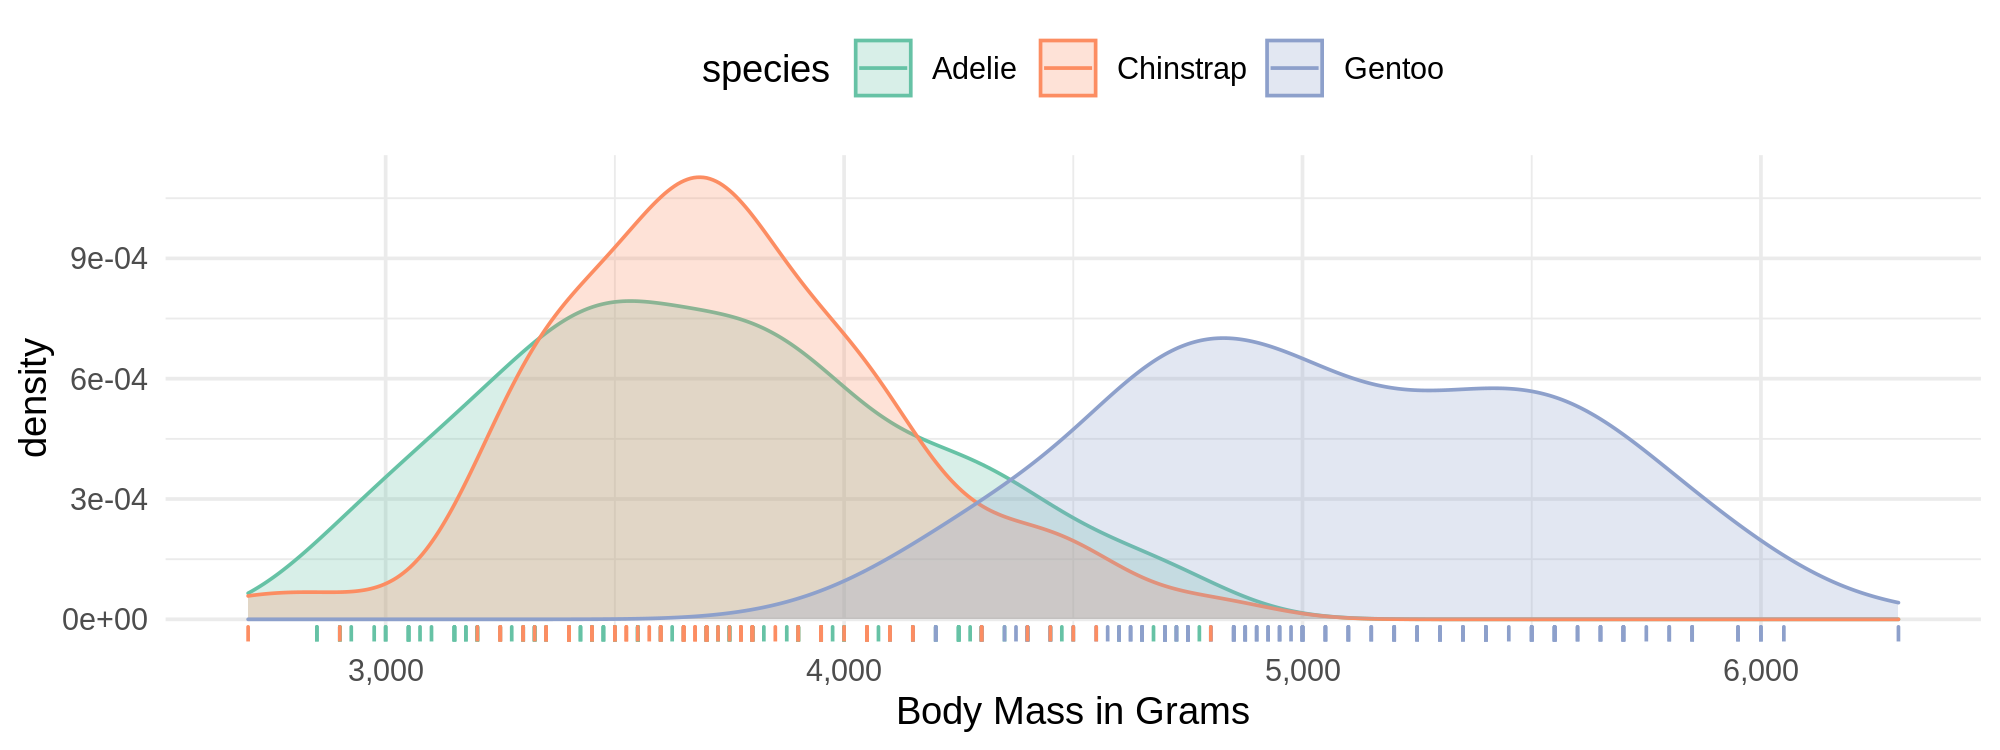

In [2]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 8)
p = ggplot (penguins, aes (x=body_mass_g, color= species, fill=species)) +
    geom_density (alpha = 0.25) + geom_rug() +
    scale_color_brewer (palette = 'Set2') +
    scale_fill_brewer (palette = 'Set2') +
    theme_minimal() + theme (legend.position = 'top') +
    scale_x_continuous(labels = comma_format()) +
    labs (x = 'Body Mass in Grams')
p


🛑 **STOP HERE** 🛑

What columns do we need to make the **ECDF** equivalent of the above chart using `geom_point` + `geom_line`?

Read the following code snippet. Can you make sense of what it's doing? What do you think the output will be?

```R
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))
```

Copy the snippet above and execute it. What's does the `ecdf` table look like?

In [3]:
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))

Using the `ecdf` table, create an **ECDF** chart of penguin body mass grouped by species.

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


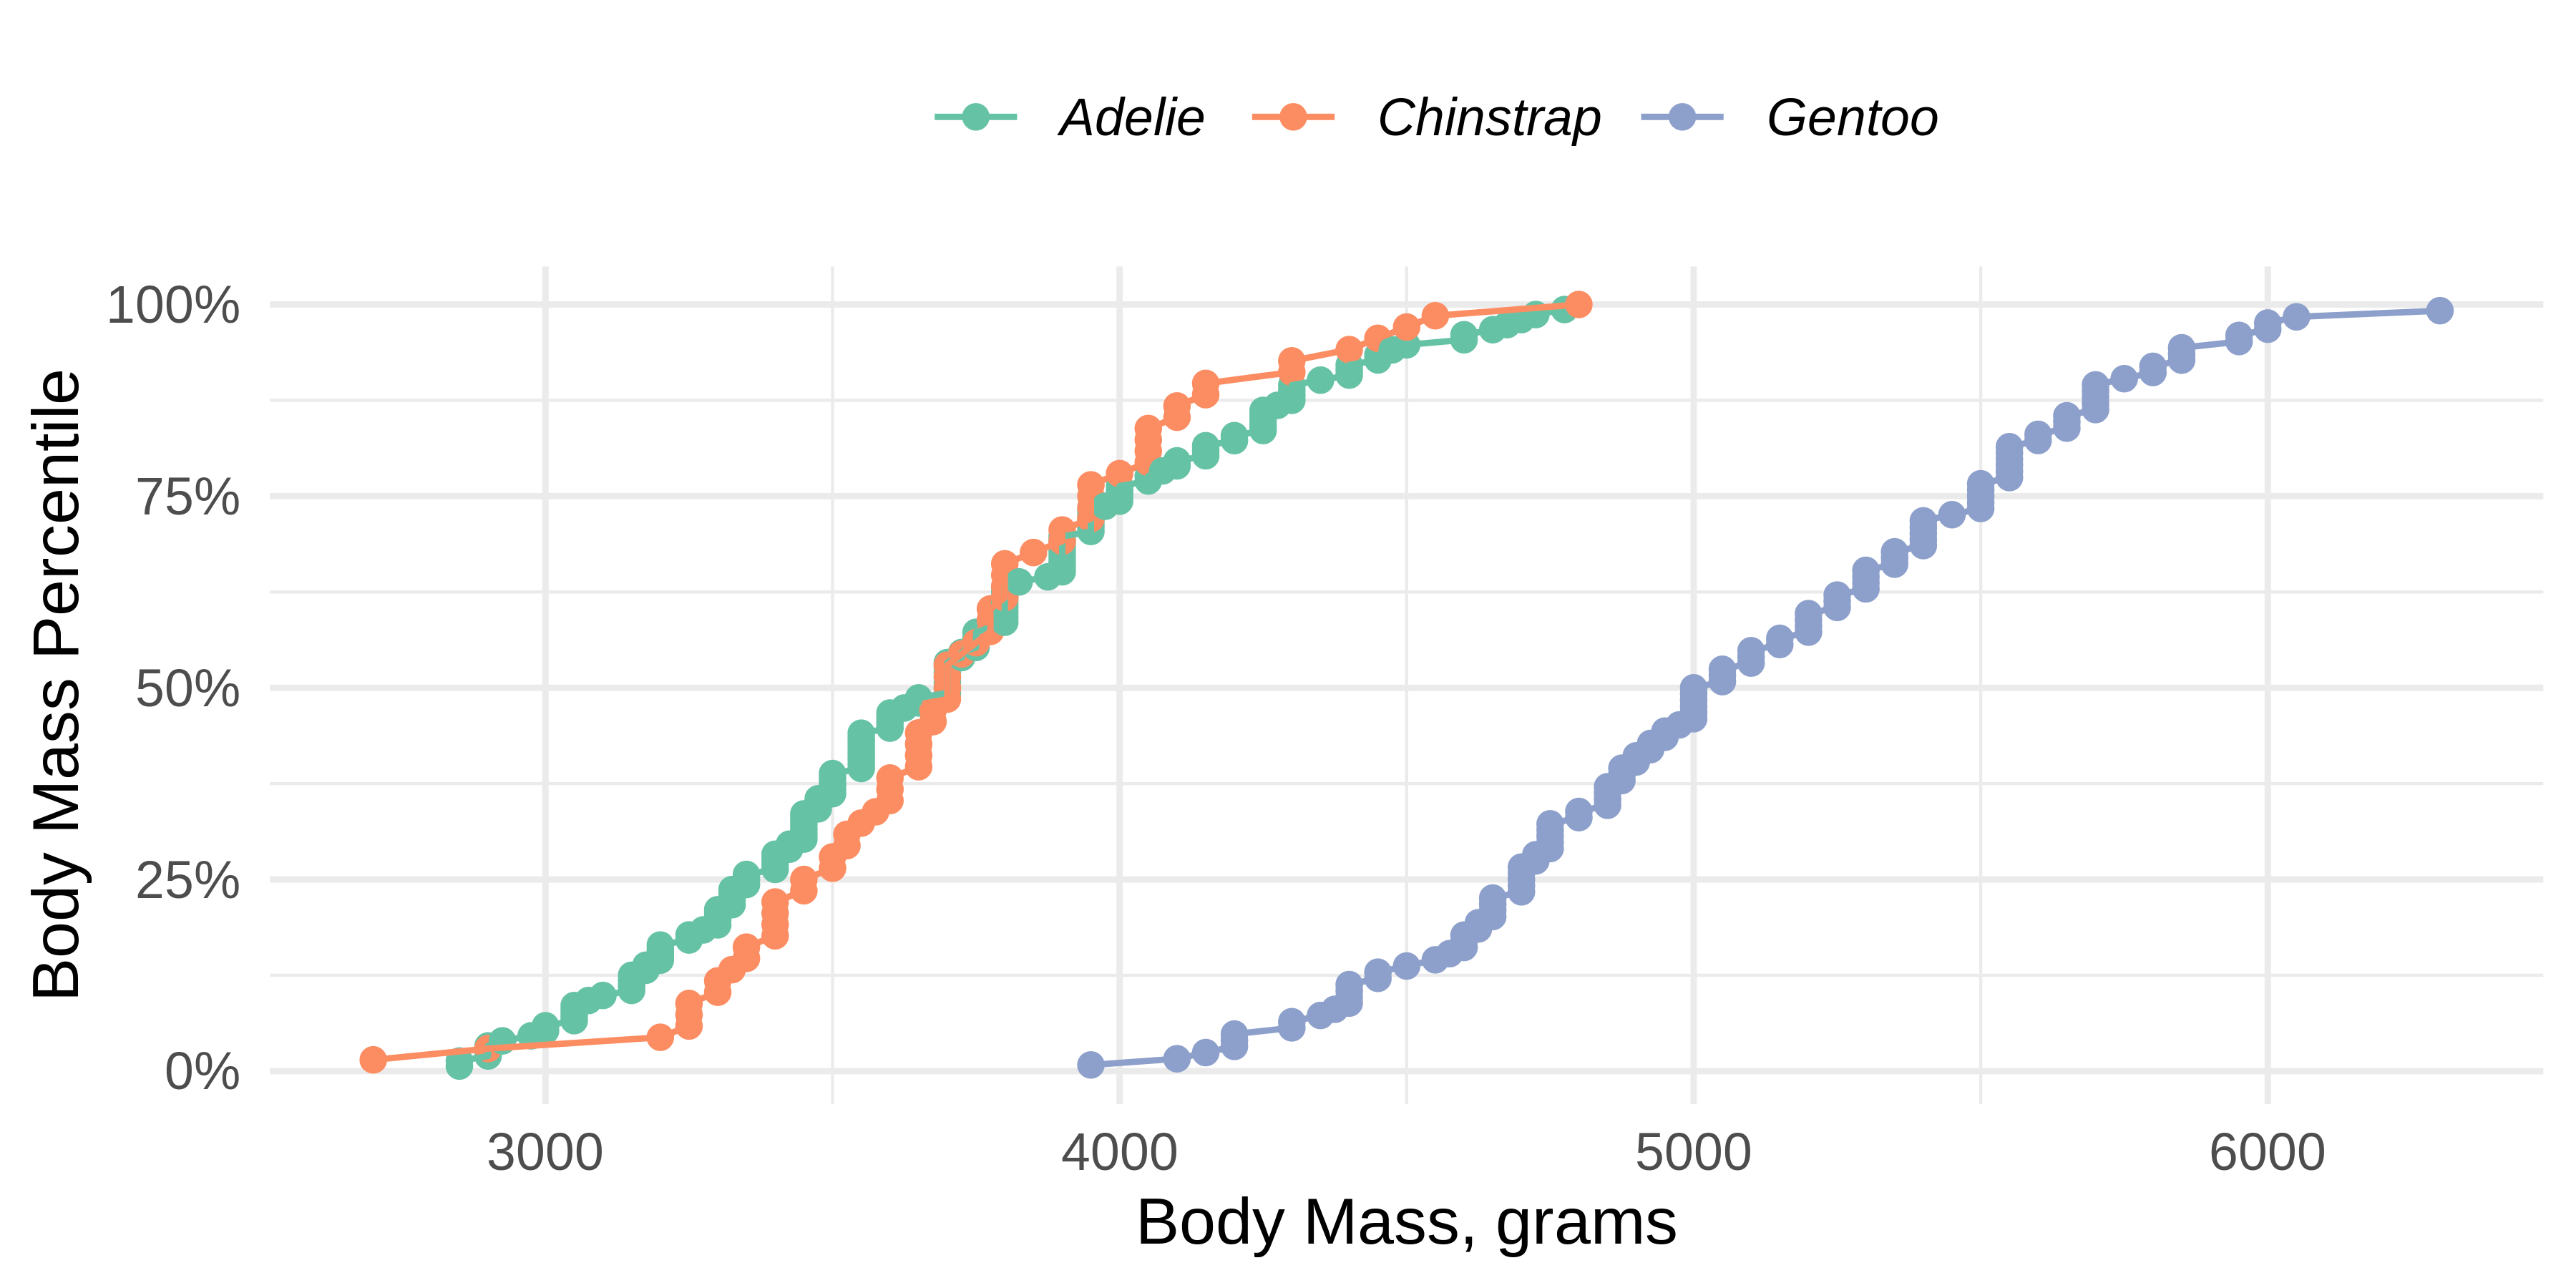

In [19]:
options(repr.plot.res = 600, repr.plot.height = 3, repr.plot.width = 6)

p = ggplot (ecdf, aes (x=body_mass_g, y= fraction_of_penguins, color = species)) +
    geom_point() + geom_line() +
    scale_y_continuous(labels = percent_format()) +
    scale_color_brewer (palette = 'Set2') +
    labs (y='Body Mass Percentile', x = 'Body Mass, grams', color = ' ') +
    theme_minimal () +
    theme (legend.position = 'top', legend.text = element_text(face = 'italic'))
    
p

Uncomment the code below, change the cell to markdown and execute if you want to see my solution.

In [10]:
 ![](https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/06/palmer-ecdf.png)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected '['
1:  ![
      ^
